In [54]:
import pandas as pd
import django
import os
from asgiref.sync import sync_to_async

In [55]:
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "Ecommerce.settings")
django.setup()

In [56]:
from shop.models import Product

In [57]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.all())

In [58]:
products = await retrieve_products_from_db()

In [59]:
len(products)

116

In [60]:
products

[<Product: Sosete ieftine>,
 <Product: Sosete scumpe>,
 <Product: Produs din linie de comanda>,
 <Product: Produsul 18>,
 <Product: Produsul 13>,
 <Product: Produsul 22>,
 <Product: Essence Mascara Lash Princess>,
 <Product: Eyeshadow Palette with Mirror>,
 <Product: Powder Canister>,
 <Product: Red Lipstick>,
 <Product: Red Nail Polish>,
 <Product: Calvin Klein CK One>,
 <Product: Chanel Coco Noir Eau De>,
 <Product: Dior J'adore>,
 <Product: Dolce Shine Eau de>,
 <Product: Gucci Bloom Eau de>,
 <Product: Annibale Colombo Bed>,
 <Product: Annibale Colombo Sofa>,
 <Product: Bedside Table African Cherry>,
 <Product: Knoll Saarinen Executive Conference Chair>,
 <Product: Wooden Bathroom Sink With Mirror>,
 <Product: Apple>,
 <Product: Beef Steak>,
 <Product: Cat Food>,
 <Product: Chicken Meat>,
 <Product: Cooking Oil>,
 <Product: Cucumber>,
 <Product: Dog Food>,
 <Product: Eggs>,
 <Product: Fish Steak>,
 <Product: Green Bell Pepper>,
 <Product: Green Chili Pepper>,
 <Product: Honey Jar>,

In [61]:
products[0]

<Product: Sosete ieftine>

In [62]:
products[0].__dict__.keys()

dict_keys(['_state', 'id', 'name', 'slug', 'description', 'price', 'image', 'created', 'updated', 'category_id'])

In [63]:
filter_keys = ['name', 'slug', 'description', 'price']

In [64]:
product_list = []

for p in products:
    new_dict = {k: p.__dict__[k] for k in filter_keys}
    product_list.append(new_dict)
product_list[1]

{'name': 'Sosete scumpe',
 'slug': 'sosete-scumpe',
 'description': 'Nu este recomandat sarakilor (gluma)',
 'price': Decimal('200.00')}

In [65]:
df = pd.DataFrame(product_list)
df

,name,slug,description,price
0,Sosete ieftine,sosete-ieftine,"Foarte bune pentru invatat, in orice anotimp!!!",3.00
1,Sosete scumpe,sosete-scumpe,Nu este recomandat sarakilor (gluma),200.00
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00
3,Produsul 18,produsul-18,,18.00
4,Produsul 13,produsul-13,,13.00
...,...,...,...,...
111,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase is a masterpiece o...,12999.99
112,Rolex Datejust,rolex-datejust,The Rolex Datejust is an iconic and versatile ...,10999.99
113,Rolex Submariner Watch,rolex-submariner-watch,The Rolex Submariner is a legendary dive watch...,13999.99
114,Amazon Echo Plus,amazon-echo-plus,The Amazon Echo Plus is a smart speaker with b...,99.99


In [66]:
df["price"].describe()

count      116
unique      59
top       8.99
freq         5
Name: price, dtype: object

In [67]:
df["price"].mean()

561.3172413793104

In [68]:
df[df["price"] == df["price"].max()]

,name,slug,description,price
113,Rolex Submariner Watch,rolex-submariner-watch,The Rolex Submariner is a legendary dive watch...,13999.99


In [69]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.select_related("category").values('name', 'slug', 'description', 'price',"category__name"))

products = await retrieve_products_from_db()

In [70]:
products[0]

{'name': 'Sosete ieftine',
 'slug': 'sosete-ieftine',
 'description': 'Foarte bune pentru invatat, in orice anotimp!!!',
 'price': Decimal('3.00'),
 'category__name': 'sosete'}

In [72]:
df = pd.DataFrame(products)
df.rename(columns={"category__name":"category"})

,name,slug,description,price,category
0,Sosete ieftine,sosete-ieftine,"Foarte bune pentru invatat, in orice anotimp!!!",3.00,sosete
1,Sosete scumpe,sosete-scumpe,Nu este recomandat sarakilor (gluma),200.00,sosete
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00,None
3,Produsul 18,produsul-18,,18.00,None
4,Produsul 13,produsul-13,,13.00,None
...,...,...,...,...,...
111,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase is a masterpiece o...,12999.99,None
112,Rolex Datejust,rolex-datejust,The Rolex Datejust is an iconic and versatile ...,10999.99,None
113,Rolex Submariner Watch,rolex-submariner-watch,The Rolex Submariner is a legendary dive watch...,13999.99,None
114,Amazon Echo Plus,amazon-echo-plus,The Amazon Echo Plus is a smart speaker with b...,99.99,None


In [73]:
import matplotlib.pylab as plt
import seaborn as sns

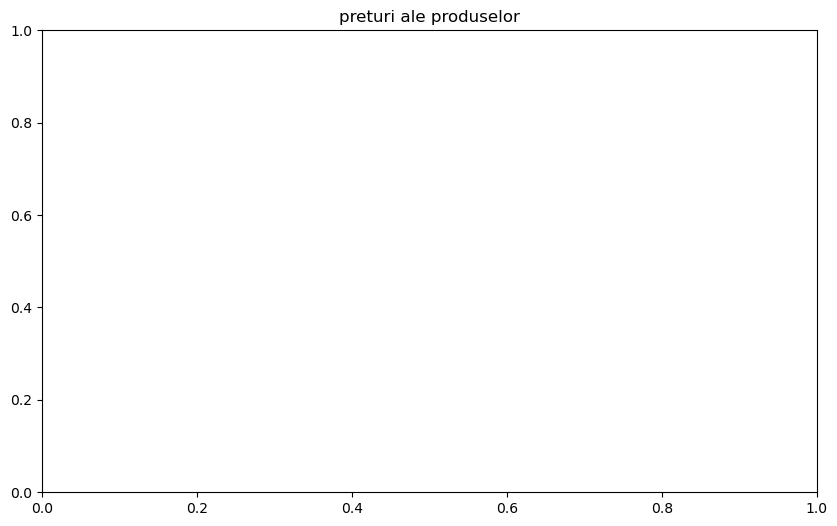

In [74]:
plt.figure(figsize=(10,6))
plt.title("preturi ale produselor")
plt.show()

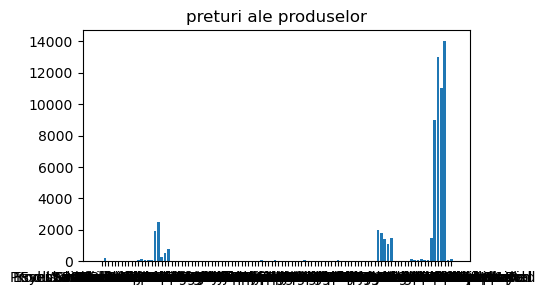

In [78]:
plt.figure(figsize=(5,3))
plt.bar(data=df, height = df["price"], x=df["name"])
plt.title("preturi ale produselor")
plt.show()

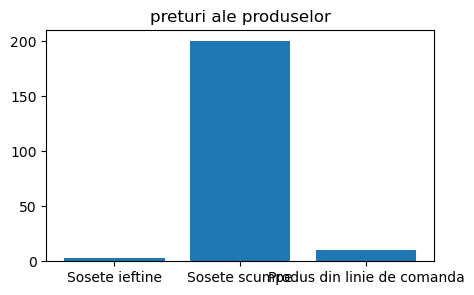

In [79]:
sliced_df = df[:3]

plt.figure(figsize=(5,3))
plt.bar(data=sliced_df, height = sliced_df["price"], x=sliced_df["name"])
plt.title("preturi ale produselor")
plt.show()